# 22회기출1
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았다. 분산에 대해 검정을 수행하시오. (유의확률 0.05)

1 연구가설과 귀무가설 작성

2 양측 검정 시행

3 검정통계량, 가설채택

In [23]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


> 분산에 대한 검정이므로 카이제곱을 이용하여 푼다

- H0 : 제품에 금속 재질 함유량은 제조사 별로 차이가 없다.
- H1 : 제품에 금속 재질 함유량은 제조사 별로 차이가 있다.

1. convert the df Series to a NumPy array using df.values.
2. calculate the sample variance using data.var().
3. specify the hypothesized variance (1.3 in your case).
4. calculate the Chi-square test statistic using the formula: (n - 1) * sample_var / hypothesized_var.
5. calculate the p-value using the Chi-square cumulative distribution function (chi2.cdf)

In [24]:
import pandas as pd
from scipy.stats import chi2
H0 = '제품에 금속 재질 함유량은 제조사 별로 차이가 없다.'
H1 = '제품에 금속 재질 함유량은 제조사 별로 차이가 있다.'
# Convert the Series to a NumPy array
data = df.values

# Calculate the sample variance
sample_var = data.var()

# Specify the hypothesized variance (1.3 in your case)
hypothesized_var = 1.3

# Calculate the test statistic
n = len(data)
chi2_stat = (n - 1) * sample_var / hypothesized_var

# Calculate the p-value
p_value = 1 - chi2.cdf(chi2_stat, n - 1)

print(f"Sample variance: {sample_var:.4f}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value<0.05:print(H1)
else : print(H0)

Sample variance: 2.1339
Chi-square statistic: 326.6508
p-value: 0.0000
제품에 금속 재질 함유량은 제조사 별로 차이가 있다.


# 22회기출2
- Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

2 관리도 시각화

In [25]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
df.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iot_number         100 non-null    int64  
 1   error_case_number  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


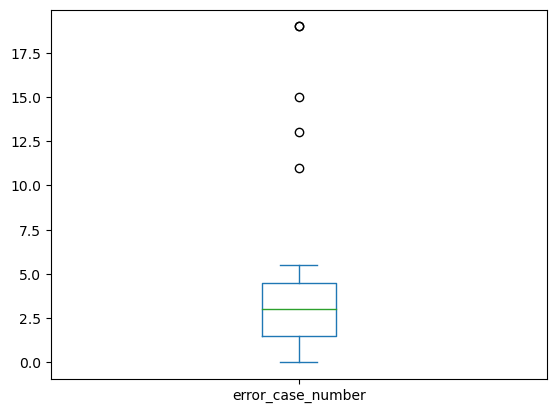

In [29]:
df['error_case_number'].plot(kind='box');

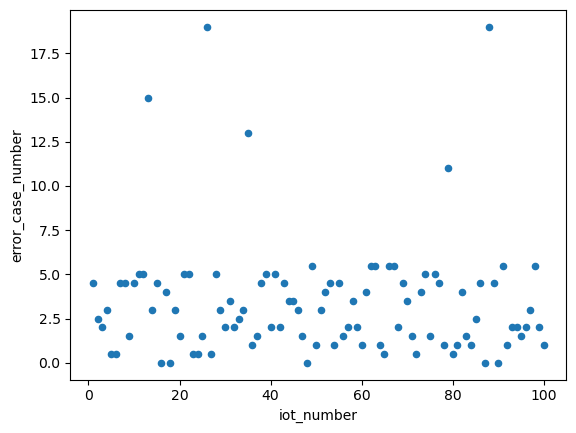

In [32]:
df.plot(x='iot_number',y='error_case_number',kind='scatter');

In [33]:
df.describe()

,iot_number,error_case_number
count,100.000000,100.000000
mean,50.500000,3.410000
std,29.011492,3.316153
min,1.000000,0.000000
25%,25.750000,1.500000
50%,50.500000,3.000000
75%,75.250000,4.500000
max,100.000000,19.000000


In [40]:
CL = df['error_case_number'].quantile(0.5)
Q3 = df['error_case_number'].quantile(0.75)
Q1 = df['error_case_number'].quantile(0.25)
iqr = Q3-Q1

UCL = Q3 + 1.5*iqr
LCL = Q1 - 1.5*iqr
print(CL, UCL, LCL)

3.0 9.0 -3.0


- 상위 이상치 5개 발생
- CL : 3.0, UCL: 9.0, LCL: 0 인것을 알수 있다

# 23회기출1
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오

귀무가설 연구가설 세우기

유효한 데이터의 숫자는?

검정통계량 및 연구 가설 채택 여부를 작성하라

In [41]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df.head()

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000


# 23회기출2
아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라

1. 귀무가설 연구가설 세우기

2. 학과와 성적이 독립일 경우의 기댓값을 구하시오

3. 검정통계량 및 연구 가설 채택 여부를 작성하라

In [54]:
df = pd.DataFrame({'사회과학':[15,60,24],'자연과학':[25,69,5],'공학':[10,77,13]})
df.index = ['1.5-2.5','2.5-3.5','3.5-4.5']
df

,사회과학,자연과학,공학
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,5,13


- H0: 학과와 성적이 관계가 없다
- H1: 학과와 성적이 관계가 있다

In [68]:
idx = np.array([float(i.split('-')[1])/float(i.split('-')[0]) for i in df.index])
idx@df.T/3

1.5-2.5    24.285714
2.5-3.5    98.533333
3.5-4.5    21.238095
dtype: float64

학과와 성적이 독립성이 있다, 즉 성적별 기대치는 학과와 상관없이 동일하게 위와같다

In [69]:
from scipy.stats import chi2_contingency
stats,p_val,dof,expected = chi2_contingency(df)
if p_val<0:
    print("H1: 학과와 성적이 관계가 있다")
else:print("H0: 학과와 성적이 관계가 없다")

H0: 학과와 성적이 관계가 없다


# 24회기출1
광고횟수와 광고비에 따른 매출액의 데이터이다

1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

2 회귀식이 유의한지 판단

In [81]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


In [84]:
df['광고비'] = df['광고비'].map({'낮음':0, '높음':1})
df['광고비']

0     0
1     0
2     0
3     1
4     1
5     1
6     0
7     1
8     1
9     0
10    1
Name: 광고비, dtype: int64

In [87]:
# df['광고비'] = df['광고비'].map({'낮음':0, '높음':1})

y = df['매출액']
X = df.drop('매출액',axis=1)
sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

E:\miniconda\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    매출액   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              72.52
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                    2.82e-06
Time:                        05:17:44   Log-Likelihood:                         -34.476
No. Observations:                  11   AIC:                                      72.95
Df Residuals:                       9   BIC:                                      73.75
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
광고횟수           2.6259      0.363      7.227      0.000       1.804       3.448
광고비            3.1597      3.839      0.823      0.432      -5.526      11.845
==============================================================================
Omnibus:                        1.050   Durbin-Watson:                   0.252
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.770
Skew:                          -0.341   Prob(JB):                        0.680
Kurtosis:                       1.898   Cond. No.                         16.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F의 p-value가 0.05보다 작으므로 회귀식 유효

# 24회기출2
각unique별로 12개의 제품을 추출하여 구한 정보가 A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

1 귀무가설과 대립가설을 세워라

2 두 평균이 차이가 있는지 검정하라

# 24회기출3
바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라

In [46]:
data = pd.DataFrame({'양성(실제)':[370,10],'음성(실제)':[10,690]},index = ['양성(예측)','음성(예측)'])
data

,양성(실제),음성(실제)
양성(예측),370,10
음성(예측),10,690


In [47]:
370/380

0.9736842105263158

# 24회기출4
주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표본을 추출함
- Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306
- 데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

2 sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라

In [49]:
import numpy as np
data = np.array([3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7])
m,s,n = data.mean(), data.std(), len(data)
me = 1.96 * s/n
conf = m-me,m+me
conf

(3.7790630162612144, 3.9987147615165632)

# 25회기출1
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [53]:
(100*80)*2/(100+80)

88.88888888888889